# Variable transformers

In this notebook, I will show you how to use the different variable transformers from feature_engine. This transformers apply mathematical transformations to the numerical variables.

For the demo, I will use the house price dataset, available in [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from importlib import reload

from feature_engine import variable_transformers as vt

In [28]:
def load_houseprice():
    data = pd.read_csv('houseprice.csv')
    return data

In [29]:
data = load_houseprice()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## LogTransformer

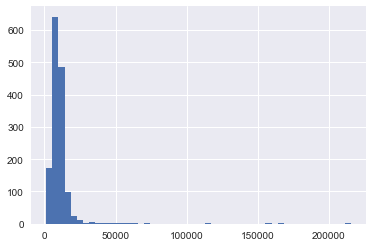

In [30]:
data['LotArea'].hist(bins=50)

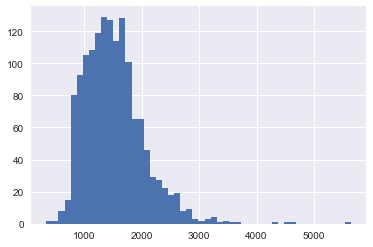

In [31]:
data['GrLivArea'].hist(bins=50)

In [32]:
lt = vt.LogTransformer(variables = ['LotArea', 'GrLivArea'])
lt.fit(data)

LogTransformer(variables=['LotArea', 'GrLivArea'])

In [33]:
# variables that will be transformed
lt.variables

['LotArea', 'GrLivArea']

In [34]:
data_tf = lt.transform(data)

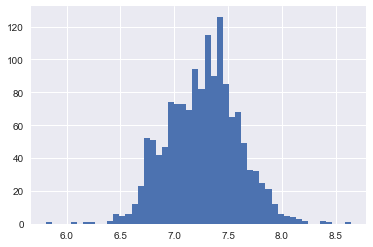

In [35]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

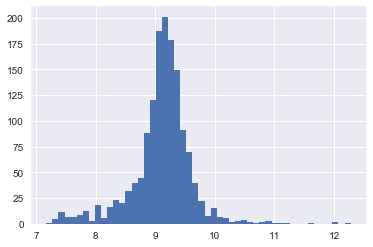

In [36]:
# transformed variable
data_tf['LotArea'].hist(bins=50)

## ReciprocalTransformer

In [37]:
data = load_houseprice()

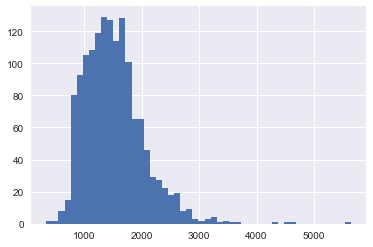

In [38]:
data['GrLivArea'].hist(bins=50)

In [39]:
rt = vt.ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])
rt.fit(data)

ReciprocalTransformer(variables=['LotArea', 'GrLivArea'])

In [40]:
data_tf = rt.transform(data)

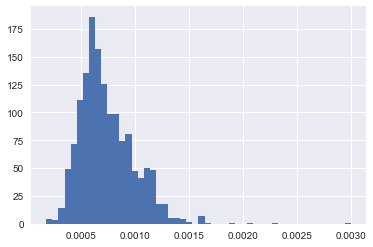

In [41]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

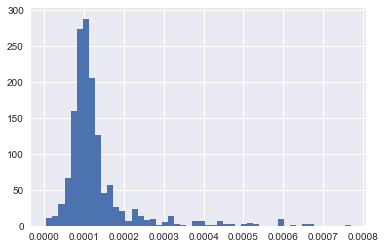

In [42]:
# transformed variable
data_tf['LotArea'].hist(bins=50)

## ExponentialTransformer

In [43]:
data = load_houseprice()

In [44]:
et = vt.ExponentialTransformer(variables = ['LotArea', 'GrLivArea'])
et.fit(data)

ExponentialTransformer(exp=0.5, variables=['LotArea', 'GrLivArea'])

In [45]:
data_tf = et.transform(data)

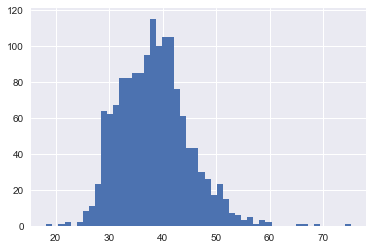

In [46]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

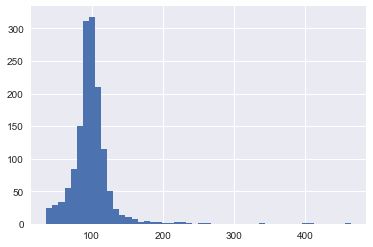

In [47]:
# transformed variable
data_tf['LotArea'].hist(bins=50)

## BoxCoxTransformer

In [48]:
bct = vt.BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])
bct.fit(data)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [49]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict

{'GrLivArea': 0.0063048860380204392, 'LotArea': 0.030946318971935564}

In [50]:
data_tf = bct.transform(data)

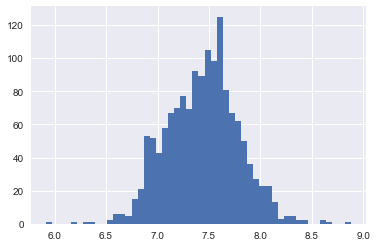

In [51]:
# transformed variable
data_tf['GrLivArea'].hist(bins=50)

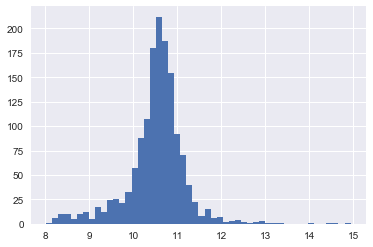

In [52]:
# transformed variable
data_tf['LotArea'].hist(bins=50)